# Table of content

* [1.0 Introduction](#section_1)
* [2.0 Code structure](#section_2)
    * [2.1 Import library and create file path](#section_2_1)
    * [2.2 Function to read file and save file](#section_2_2)
    * [2.3 Check and correct data in the dirty file and impute value in the missing file](#section_2_3)
        * [2.3.1 Read file and check overall data](#section_2_3_1)
        * [2.3.2 Check and correct gender column](#section_2_3_2)
        * [2.3.3 Check and correct airline_flight column](#section_2_3_3)
        * [2.3.4 Check and correct dob, dop, and dod column](#section_2_3_4)
        * [2.3.5 Check and correct is_adult column](#section_2_3_5)
        * [2.3.6 Check and correct distance column](#section_2_3_6)
        * [2.3.7 Check and correct price_tier column](#section_2_3_7)
        * [2.3.8 Impute missing data](#section_2_3_8)
            * [2.3.8.1 Check overall data](#section_2_3_8_1)
            * [2.3.8.2 Create necessary column and drop rows that contain the missing value](#section_2_3_8_2)
            * [2.3.8.3 Train the linear regression model](#section_2_3_8_3)
            * [2.3.8.4 Impute value and save missing file](#section_2_3_8_4)
        * [2.3.9 Check and correct has_loyalty column](#section_2_3_9)
        * [2.3.10 Save dirty file](#section_2_3_10)
    * [2.4 Remove outlier from outlier file](#section_2_4)
        * [2.4.1 Read file and analyse overall data by using graph](#section_2_4_1)
        * [2.4.2 Predict price using the linear regression and plot graph to detect outlier](#section_2_4_2)
        * [2.4.3 Remove outlier and re-check](#section_2_4_3)
        * [2.4.4 Save outlier file](#section_2_4_4)
* [3.0 Conclusion](#section_3)
* [References](#reference)

# 1.0 Introduction <a class="anchor" id="section_1"></a>

The achievement of this project is to correct the anomaly and check the correctness in the dirty file, impute the missing value in the missing file, and remove the outlier in the outlier file. In this project, there are 3 major steps for correcting the data: the first step is checking and detecting anomalies in the data. The second is creating methods and algorithms to correct the data, and the last is re-check the data whether anomalies are corrected or not, we also check the logic of the algorithm so that it can correct anomalies properly and correctly. In this report, we will explain and provide the reason for each step of the process.

Furthermore, there is a lot of function that create to correct the anomaly, impute value and drop outlier. Thus, to prevent confusion then in this part we will briefly explain each function before we enter the main topic.
- read_file(file_path): read data passing file_path
- save_file(file_name,data): save file with specific name as argument and data that we want to save
- gender_cleaning(data): correct anomaly in gender column
- airline_cleaning(data): correct anomaly in airline_flight column
- clean_date(data,column): correct the format of date so we can choose which date column that we are going to fix e.g. dob, dop and dod
- age_cleaning(data): correct anomaly in is_adult column
- distance_cleaning(data,country_df): correct anomaly in distance column using data and country data as argument
- price_tier_cleaning(data): correct price_tier column
- impute_price(data,airline): impute value in missing cell with specific airline
- has_loyalty_cleaning(data): correct anomaly in has_loyalty column
- remove_outlier(data,upper_fence,lower_fence): remove outlier with determine the value of upper_fence and lower_fence

# 2.0 Code structure <a class="anchor" id="section_2"></a>

## 2.1 Import library and create file path <a class="anchor" id="section_2_1"></a>

Import the library that is used in this assignment following this:
- Pandas is used to analyse the data and store data in the data frame
- NumPy is used to calculate the quantile
- regular expression(re) use to match the pattern of the string
- math is  used to calculate the distance between countries
- mathplotlib is used to plot graph
- sklearn.linear_model is for using linear regression function
- sklearn.model_selection is used for training the data in the linear regression method
- dateutil.relativedelta is used for calculating the date
- datetime is used to convert data type string to date type

In [1]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
from datetime import datetime

For this step, we create the variable to store the file path for each file:
- file_dirty contains the path for the dirty data file
- file_missing contains the path for the missing data file
- file_outlier contains the path for the outlier data file
- country contains data of  file that has the country name and latitude and longitude

In [2]:
file_dirty = "_dirty.csv"
file_missing = "_missing.csv"
file_outlier = "_outlier.csv"
country = "countries.csv"

## 2.2 function to read file and save file <a class="anchor" id="section_2_2"></a>

In this section, we will create a function to read the file for correcting and save csv file after we finish correcting the data. For function read_file we pass the file path to this function and store data in a variable then return it and for the save_file function, we pass the file name and the data to save in the current work directory.

In [3]:
def read_file(file_path):
    df = pd.read_csv(file_path)
    return df

In [4]:
def save_file(file_name,data):
    data.to_csv(f'{file_name}.csv',index=False)

## 2.3 Check and correct data in the dirty file and impute value in the missing file <a class="anchor" id="section_2_3"></a>

### 2.3.1 Read file and check overall data <a class="anchor" id="section_2_3_1"></a>

In the first step in this part, we store dirty data in the variable name dirty_data by passing the path file of the dirty file which we mentioned in 2.1. After that, we check type of data using command .info() and use the command .describe(include=["O"]) to see the uniqueness in each column.

In [5]:
#store data in variable name dirty_data
dirty_data = read_file(file_dirty)

In [6]:
#check data type
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticket_id       500 non-null    object 
 1   airline_flight  500 non-null    object 
 2   name            500 non-null    object 
 3   gender          500 non-null    object 
 4   dob             500 non-null    object 
 5   dop             500 non-null    object 
 6   dod             500 non-null    object 
 7   is_adult        500 non-null    int64  
 8   from            500 non-null    object 
 9   to              500 non-null    object 
 10  distance        500 non-null    float64
 11  num_stops       500 non-null    int64  
 12  has_loyalty     500 non-null    int64  
 13  price_tier      500 non-null    int64  
 14  price           500 non-null    float64
dtypes: float64(2), int64(4), object(9)
memory usage: 58.7+ KB


After we check the data by using describe function we can see that the gender has 5 unique values which should be only 2 ("M", "F") so from this part, we know that there are anomalies in gender.

In [7]:
#check in each column as we can see the gender has unique 5 which it should be only 2
dirty_data.describe(include=['O'])

,ticket_id,airline_flight,name,gender,dob,dop,dod,from,to
count,500,500,500,500,500,500,500,500,500
unique,500,473,495,5,488,283,337,209,214
top,IDYY98812,Calisto\CS-598,Ms. Lillie Schuttler,F,1994-01-09,2021-07-20,2022-05-19,Cambodia,Mauritania
freq,1,3,2,250,2,6,5,6,7


### 2.3.2 Check and correct gender column <a class="anchor" id="section_2_3_2"></a>

The code below is for splitting the title, first name and last name the purpose for doing this is to check whether gender is matched with the title or not. For example, Mr. should be male and Ms. should be female. After we split and create a new column to store its value and keep them in the variable named coltitle, we combine this 3 new columns in dirty_data then we check the data frame to make sure that the process is done correctly by using dirty_data.head().

In [8]:
#split the name to check gender match with title or not and concatenate new columns in data frame
coltitle = dirty_data['name'].apply(lambda s: pd.Series({'title': s.split('.')[0].strip(),'firstname':s.split(' ')[1].strip(),'lastname':s.split(' ')[2].strip()}))
dirty_data = pd.concat([dirty_data,coltitle],axis=1)#merge new column into dirty_data variable
dirty_data.head()#check dataframe

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,distance,num_stops,has_loyalty,price_tier,price,title,firstname,lastname
0,IDYY98812,Calisto\CS-715,Ms. Nancy Lambert,F,2012-08-06,2021-04-07,2021-04-27,0,United Arab Emirates,Mauritania,6624.47,2,1,2,1120.53,Ms,Nancy,Lambert
1,IDYY76567,Calisto\CS-234,Mr. Wallace Maillet,M,1989-09-11,2021-05-23,2021-08-15,1,Central African Republic,Liberia,3358.26,0,0,2,1076.00,Mr,Wallace,Maillet
2,IDYY73702,Calisto\CS-121,Ms. Tina Ranck,F,1998-01-27,2021-08-17,2021-09-27,1,Brunei,El Salvador,16724.50,2,0,2,2983.12,Ms,Tina,Ranck
3,IDYY76991,Calisto\CS-665,Ms. Addie Hobbs,F,1980-08-02,2021-05-17,2021-08-31,1,Iran,Belize,13201.17,1,1,2,2286.76,Ms,Addie,Hobbs
4,IDXX53781,Adonis\AS-824,Ms. Maria Carroll,F,1999-06-22,2021-01-18,2021-11-09,1,Somalia,Azerbaijan,3897.54,1,1,1,709.45,Ms,Maria,Carroll


Then we know that the gender has anomalies from checking in uniqueness so in the code below, we aim to check the format of the gender by using the value_counts() command to count the amount of all formats in gender. Besides, we want to make sure that gender and title both are matched, for checking this we use pd.crosstab() and put title column and the gender column to make the table between the values of each of them.

In [9]:
#check in gender column
dirty_data.gender.value_counts()

F         250
M         246
m           2
female      1
f           1
Name: gender, dtype: int64

In [10]:
#check gender and title column
pd.crosstab(dirty_data['title'],dirty_data['gender'])

gender,F,M,f,female,m
title,,,,,
Mr,0,240,0,0,2
Ms,250,6,1,1,0


As we see the output, there are people with title Ms who have gender as male so the code below is used condition to select the row that contains title as Ms but gender as male

In [11]:
#check whether gender and title is matched or not because we see in the previous code that some rows gender are not match title
dirty_data.loc[((dirty_data['gender']=='M')&(dirty_data['title']=='Ms'))]

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,distance,num_stops,has_loyalty,price_tier,price,title,firstname,lastname
45,IDYY09084,Calisto\CS-293,Ms. Doreen Green,M,1991-08-25,2021-06-07,2022-04-10,1,Saint Lucia,Vanuatu,14881.96,2,1,2,2409.19,Ms,Doreen,Green
99,IDXX14649,Adonis\AS-262,Ms. Anna Baker,M,1987-09-24,2021-08-08,2021-08-23,1,Myanmar [Burma],Comoros,6817.33,0,0,2,1865.31,Ms,Anna,Baker
278,IDXX05708,Adonis\AS-447,Ms. Lindsey Pulliam,M,2006-12-23,2021-12-25,2022-05-20,0,Egypt,Saint Helena,7172.21,1,1,2,1562.47,Ms,Lindsey,Pulliam
283,IDYY49996,Calisto\CS-906,Ms. Frances Parker,M,1998-04-20,2021-11-01,2022-03-16,1,Malawi,Luxembourg,7542.73,1,0,2,1626.09,Ms,Frances,Parker
297,IDZZ48720,Omega\OG-665,Ms. Lisa Yoes,M,2006-09-06,2021-11-16,2021-12-27,0,Kiribati,Christmas Island,9466.82,0,0,2,1542.18,Ms,Lisa,Yoes
332,IDXX47942,Adonis\AS-623,Ms. Linda Giesen,M,2007-08-29,2021-06-29,2021-11-10,0,Taiwan,Portugal,11250.50,1,1,2,2292.32,Ms,Linda,Giesen


Then we create a function to correct anomalies of the data named gender_cleaning. In this function, we pass the data for correcting the anomalies such as the format of the gender or unmatched in title and gender. The method of this function is to check the value in column gender in each row if the format is not the same as standard then we change the format. Furthermore, we add more the condition on unmatched in title and gender so we can clean all the anomalies in gender within this function.

In [12]:
#In this fuction we fix gender anomaly and also collect the index of row that contain anomalies. In this part we can add
##more condition if we find other anomaly of gender
def gender_cleaning(data):
    for i in data.index:#loop for all the rows in dataframe
        if data.loc[i,"gender"]=='m':#check whether the gender symbol is anomaly or not
            data.loc[i,"gender"]='M'#fix the anomaly
        elif data.loc[i,"gender"]=='female':#check whether the gender symbol is anomaly or not
            data.loc[i,"gender"]='F'#fix the anomaly
        elif data.loc[i,"gender"]=='f':#check whether the gender symbol is anomaly or not
            data.loc[i,"gender"]='F'#fix the anomaly
        elif data.loc[i,"gender"]=='M' and data.loc[i,"title"]=='Ms':#check the rows that unmatched in gender and title
            data.loc[i,'gender'] = 'F'#fix the anomaly
    return data#return data that already fix

Call function gender_cleaning and pass variable dirty_data which contains the dirty file to this function and store it in the same variable (dirty_data). After that, we re-check the correctness in column gender again whether the function gender_cleaning is worked or not by using value_counts() to count the amount of unique value and the pd.crosstab() to check unmatched in gender and title.

In [13]:
#call function to fix the data
dirty_data = gender_cleaning(dirty_data)

In [14]:
#re-check again whether all anomalies are fix or not
dirty_data.gender.value_counts()

F    258
M    242
Name: gender, dtype: int64

In [15]:
#re-check title and gender
pd.crosstab(dirty_data['title'],dirty_data['gender'])

gender,F,M
title,,
Mr,0,242
Ms,258,0


### 2.3.3 Check and correct airline_flight column <a class="anchor" id="section_2_3_3"></a>

The next step is to check the anomaly in airline_flight. In airline_flight it contains the name of the airline and the abbreviation of it separated by \ and followed by the number of flights separated by -. Hence, we split all of this using apply to apply this command for all the rows and use lambda then using command split() to separate the string that we want to store in the new column. For airline name store in column name airline, abbreviation store in column abbreviation, and the flight number store in column flight_number and store them in variable name airline. After this process, we combine the variable name airline(3 new columns) into the dirty_data. Then we first check the format of abbreviation using value_counts(). As we can see, the format of abbreviation should be in uppercase letters but we spot 4 lower cases in this one.

In [16]:
#split airline, abbreviation and flight number and store them in each column keep them in variable airline
airline = dirty_data['airline_flight'].apply(lambda x: pd.Series({'airline':x.split('\\')[0].strip(),'abreviation':x.split('\\')[1].split('-')[0].strip(),'flight_number':x.split('-')[1].strip()}))
dirty_data = pd.concat([dirty_data,airline],axis=1) #merge the airline or 3 new columns in dirty_data
dirty_data.abreviation.value_counts()#check the value of abbreviation

AS    174
CS    162
OG    160
og      2
cs      2
Name: abreviation, dtype: int64

The purpose of the code below is to check that when we split the name of the airline and combine them together, index is still the same from we split the airline name so the column of airline, abbreviation and flight number can fix the anomaly and put it back in the column airline_flight.

In [17]:
#This for checking whether after split the airline_flight the index still the same
print(airline.loc[airline['abreviation'].str.islower()])
print(dirty_data.loc[airline['abreviation'].str.islower()])

     airline abreviation flight_number
155    Omega          og           437
257  Calisto          cs           002
329  Calisto          cs           585
364    Omega          og           270
     ticket_id  airline_flight              name gender         dob  \
155  IDZZ40552    Omega\og-437     Mr. Chas Hahn      M  1983-04-27   
257  IDYY01353  Calisto\cs-002   Mr. Steven Cone      M  1999-08-14   
329  IDYY20490  Calisto\cs-585  Mr. George Raley      M  2020-05-23   
364  IDXX90401    Omega\og-270  Ms. Geneva Glaus      F  1982-05-25   

            dop         dod  is_adult        from                  to  ...  \
155  2021-09-07  2022-03-02         1  Tajikistan             Ecuador  ...   
257  2021-08-03  2021-11-02         1    Cambodia             Ireland  ...   
329  2021-07-23  2021-11-08         0     Vietnam    Papua New Guinea  ...   
364  2021-02-07  2021-05-18         1     Belgium  Dominican Republic  ...   

     num_stops  has_loyalty  price_tier    price  title fi

After that, we use the command pd.crosstab() to check unmatched between airline name and abbreviation and we can see the anomaly in the abbreviation of airline too.

In [18]:
#check that there is no unmatched between abreviation and airline name 
pd.crosstab(dirty_data['airline'],dirty_data['abreviation'])

abreviation,AS,CS,OG,cs,og
airline,,,,,
Adonis,174,0,0,0,0
Calisto,0,162,0,2,0
Omega,0,0,160,0,2


The function name airline_cleaning is created to correct the format of abbreviation in airline flight. The condition in this function is if the column abbreviation in each row contains lower case then we will change to uppercase and assign a new value in the same row and column and combine the airline, abbreviation and flight number together in the correct format and put it back in airline_flight column.

In [19]:
def airline_cleaning(data):
    for i in data.index:
        if data.loc[i,"abreviation"].islower(): #check whether abbreviation of airline is in lower case or not
            data.loc[i,"abreviation"] = data.loc[i,'abreviation'].upper()#if it in lower case then change into upper case
            data.loc[i,"airline_flight"] = data.loc[i,'airline']+'\\'+data.loc[i,'abreviation']+'-'+data.loc[i,'flight_number']
    return data

Then we called the function and passed the dirty_data as an argument to the function and store the value after correcting the anomaly in the same variable name. The following chuck code is to check after fixing the anomaly in the airline by splitting the value in airline_flight of dirty_data and store in the variable name airline_check afterwards use pd.crosstab to check the airline name and abbreviation.

In [20]:
dirty_data = airline_cleaning(dirty_data)#call function

In [21]:
#re-check in column airline_flight whether the anomaly is fix or not by creating new variable and split the name of
##airline_flight in to new conlumn and using command crosstab
airline_check = dirty_data['airline_flight'].apply(lambda x: pd.Series({'airline':x.split('\\')[0].strip(),'abreviation':x.split('\\')[1].split('-')[0].strip(),'flight_number':x.split('-')[1].strip()}))
pd.crosstab(airline_check['airline'],airline_check['abreviation'])

abreviation,AS,CS,OG
airline,,,
Adonis,174,0,0
Calisto,0,164,0
Omega,0,0,162


### 2.3.4 Check and correct dob, dop, and dod column <a class="anchor" id="section_2_3_4"></a>

In this step, we move to check data in dob column. The methodology to check anomaly in this column is using a regular expression to search for the correct format. The command is chosen row which selects rows from the condition if the pattern of the regular expression is unmatched then returns the rows that are unmatched. The format of regular expression sees in figure 1.

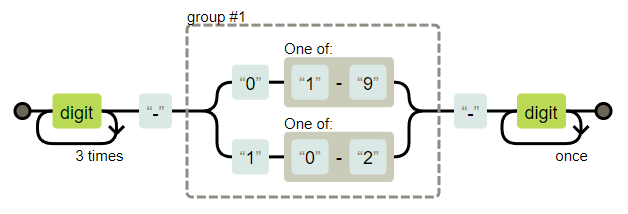

                                                            Figure 1
Because the standard format of date data in this file use yyyy-mm-dd but we might get the format that day and month are alternated so to detect that one the number in the middle of the regular expression is should only match number 01-12.

In [22]:
#search for different pattern in dob
dirty_data.loc[(dirty_data.dob.str.match('\d{4}-(0[1-9]|1[0-2])-\d{2}')==False)]

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,...,num_stops,has_loyalty,price_tier,price,title,firstname,lastname,airline,abreviation,flight_number
72,IDZZ55616,Omega\OG-073,Ms. Coral Bordelon,F,2006-15-08,2021-05-18,2021-12-13,0,Jersey,Mauritania,...,1,1,1,439.23,Ms,Coral,Bordelon,Omega,OG,073
95,IDYY89200,Calisto\CS-706,Mr. Brandon Schmidt,M,1998-Feb-05,2021-02-05,2021-04-21,1,Argentina,Croatia,...,1,1,2,2141.01,Mr,Brandon,Schmidt,Calisto,CS,706
102,IDXX17777,Adonis\AS-239,Mr. Troy Bailey,M,1982-25-10,2021-01-24,2021-12-28,1,South Africa,Ukraine,...,2,0,1,1185.47,Mr,Troy,Bailey,Adonis,AS,239
177,IDYY21257,Calisto\CS-154,Mr. James Free,M,2002-26-01,2021-01-12,2021-04-26,1,Argentina,Macedonia [FYROM],...,2,1,2,2051.19,Mr,James,Free,Calisto,CS,154
321,IDZZ66244,Omega\OG-346,Mr. Samuel Marcus,M,Mon Jan 6 00:00:00 1992,2021-09-24,2022-06-20,1,Canada,Malta,...,0,0,1,1021.04,Mr,Samuel,Marcus,Omega,OG,346
416,IDZZ10182,Omega\OG-391,Ms. Janet Clark,F,2003-Oct-05,2021-09-10,2022-05-02,1,Bermuda,Guinea,...,1,0,1,775.72,Ms,Janet,Clark,Omega,OG,391


The clean_date function operates by passing the data and the name of the specific column that needs to correct the date format for the date value. The method of this function is we use a regular expression to match the date pattern that is an anomaly. Referring to the output of code chuck above, we found 3 pattern anomalies in dob so we can express them in regular expression as in figures 2 and 3. Besides, the date format that date and month are alternated we can detect by using the format as in figure 1 but using boolean as False.

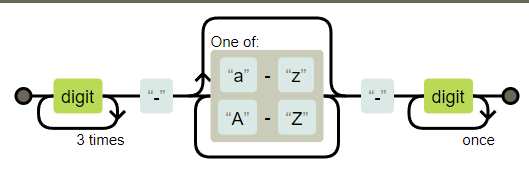
                                                                    
                                                             Figure 2

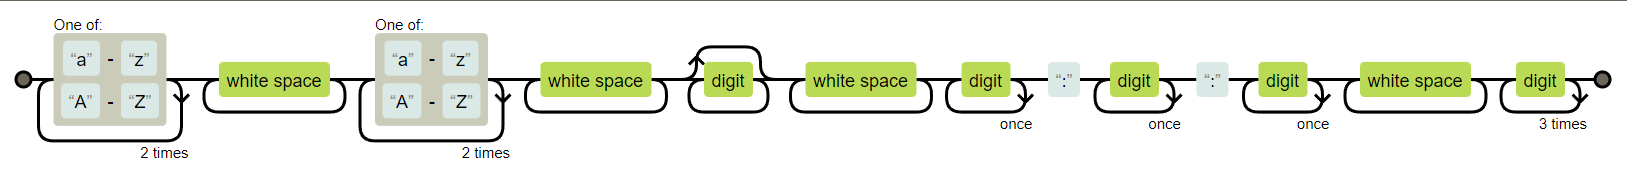

                                                             Figure 3

After the condition is matched in the cell that contains the anomaly we need to change the data type from string to datetime object first by using strptime command and passing the argument which is a string value in that cell and format of it and using strftime command to return correct format of datetime as a string object.

In [23]:
#This function create for fix anomaly for date which we can use with dob dop and dod
def clean_date(data,column):
    pattern =['\d{4}-(0[1-9]|1[0-2])-\d{2}','\d{4}-[a-zA-Z]*?-\d{2}','[a-zA-Z]{3}\s+?[a-zA-Z]{3}\s+?\d*?\s+?\d{2}:\d{2}:\d{2}\s+?\d{4}']
    for i in data.index:
        if bool(re.search(pattern[0],data[column][i])):#check whether the value match first pattern(correct format)
            continue
        elif bool(re.search(pattern[1],data[column][i])):#check whether the value match the second format
            data.loc[i,column] = datetime.strptime(data[column][i],'%Y-%b-%d').strftime('%Y-%m-%d')#if match it means need to change format
        elif bool(re.search(pattern[2],data[column][i])):#check whether the value match the third format
            data.loc[i,column] = datetime.strptime(data[column][i],'%a %b %d %H:%M:%S %Y').strftime('%Y-%m-%d')#if match it means need to change format
        elif bool(re.search(pattern[0],data[column][i]))==False:#check whether the value unmatch with the first format
            data.loc[i,column] = datetime.strptime(data[column][i],'%Y-%d-%m').strftime('%Y-%m-%d')#if match it means need to change format
        else:
            print('Error in date pattern') #unmatched in the pattern need to add more pattern
    return data #return data
    

Called the clean_date function to correct the dob column and store in the same variable name (dirty_data). Then we need to re-check that the anomalies has been fixed properly with the same code as for detect the anomaly e.g. dirty_data.loc[(dirty_data.dob.str.match('\d{4}-(0[1-9]|1[0-2])-\d{2}')==False)].

In [24]:
#clean dob
dirty_data = clean_date(dirty_data,'dob')

In [25]:
#re-check dob pattern
dirty_data.loc[(dirty_data.dob.str.match('\d{4}-(0[1-9]|1[0-2])-\d{2}')==False)]

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,...,num_stops,has_loyalty,price_tier,price,title,firstname,lastname,airline,abreviation,flight_number


And repeatedly do the same steps with column dop and dod:
- Check the anomaly
- Called function clean_date and pass the variable that contains the data frame and  the column name
- re-check whether the anomalies have been corrected or not

In [26]:
#search for different pattern in dop
dirty_data.loc[dirty_data.dop.str.match('\d{4}-(0[1-9]|1[0-2])-\d{2}')==False]

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,...,num_stops,has_loyalty,price_tier,price,title,firstname,lastname,airline,abreviation,flight_number
61,IDZZ98204,Omega\OG-263,Mr. Dominic Jones,M,2010-12-06,Mon Mar 8 00:00:00 2021,2022-02-19,0,Iceland,Antarctica,...,2,0,2,2067.26,Mr,Dominic,Jones,Omega,OG,263
132,IDXX36788,Adonis\AS-032,Ms. Jacqueline Burrell,F,2011-04-28,2021-19-12,2022-08-03,0,Nigeria,Papua New Guinea,...,2,1,1,1543.08,Ms,Jacqueline,Burrell,Adonis,AS,032
171,IDYY51103,Calisto\CS-598,Mr. Gary Reed,M,2015-04-14,2021-17-06,2022-01-27,0,Mauritius,Laos,...,2,1,1,644.37,Mr,Gary,Reed,Calisto,CS,598
248,IDYY83820,Calisto\CS-455,Ms. Dolly Frazier,F,1991-05-11,Sun May 9 00:00:00 2021,2021-10-27,1,Zambia,Bolivia,...,1,1,2,1783.95,Ms,Dolly,Frazier,Calisto,CS,455
326,IDYY50783,Calisto\CS-704,Ms. Lillie Schuttler,F,1980-09-08,2021-25-01,2021-07-20,1,Mayotte,Togo,...,2,1,2,1059.65,Ms,Lillie,Schuttler,Calisto,CS,704


In [27]:
#clean date pattern in dop
dirty_data = clean_date(dirty_data,'dop')

In [28]:
#check for the column that abnormal pattern fix already
dirty_data.loc[61]

ticket_id                 IDZZ98204
airline_flight         Omega\OG-263
name              Mr. Dominic Jones
gender                            M
dob                      2010-12-06
dop                      2021-03-08
dod                      2022-02-19
is_adult                          0
from                        Iceland
to                       Antarctica
distance                   15666.74
num_stops                         2
has_loyalty                       0
price_tier                        2
price                       2067.26
title                            Mr
firstname                   Dominic
lastname                      Jones
airline                       Omega
abreviation                      OG
flight_number                   263
Name: 61, dtype: object

In [29]:
#re-check dop pattern
dirty_data.loc[dirty_data.dop.str.match('\d{4}-(0[1-9]|1[0-2])-\d{2}')==False]

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,...,num_stops,has_loyalty,price_tier,price,title,firstname,lastname,airline,abreviation,flight_number


In [30]:
#search for different pattern in dod
dirty_data.loc[dirty_data.dod.str.match('\d{4}-(0[1-9]|1[0-2])-\d{2}')==False]

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,...,num_stops,has_loyalty,price_tier,price,title,firstname,lastname,airline,abreviation,flight_number
91,IDYY32552,Calisto\CS-267,Ms. Maria May,F,1985-08-09,2021-07-13,2021-23-10,1,Monaco,Georgia,...,1,1,2,792.90,Ms,Maria,May,Calisto,CS,267
167,IDYY51317,Calisto\CS-631,Mr. Charles Mccann,M,1986-11-28,2021-03-14,2021-14-09,1,Cambodia,Fiji,...,2,1,1,906.45,Mr,Charles,Mccann,Calisto,CS,631
187,IDZZ58314,Omega\OG-274,Mr. Harvey Forbes,M,2007-05-21,2021-04-01,2021-17-09,0,Svalbard and Jan Mayen,Ethiopia,...,1,1,2,1100.12,Mr,Harvey,Forbes,Omega,OG,274
234,IDXX60361,Adonis\AS-222,Ms. Lillie Schuttler,F,1995-09-28,2021-07-18,2021-24-09,1,Niger,Saint Vincent and the Grenadines,...,0,0,2,1982.89,Ms,Lillie,Schuttler,Adonis,AS,222
384,IDZZ55476,Omega\OG-665,Mr. Rubin Horn,M,1989-01-19,2021-12-04,2022-27-08,1,Uganda,Poland,...,1,0,2,1100.31,Mr,Rubin,Horn,Omega,OG,665
394,IDYY16537,Calisto\CS-456,Mr. Joseph Irish,M,2002-12-26,2021-06-17,Wed Aug 11 00:00:00 2021,1,Finland,Egypt,...,0,1,2,1056.07,Mr,Joseph,Irish,Calisto,CS,456


In [31]:
#called function to clean data and store in the same variable
dirty_data = clean_date(dirty_data,'dod')

In [32]:
#re-check again after correcting
dirty_data.loc[dirty_data.dod.str.match('\d{4}-(0[1-9]|1[0-2])-\d{2}')==False]

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,...,num_stops,has_loyalty,price_tier,price,title,firstname,lastname,airline,abreviation,flight_number


### 2.3.5 Check and correct is_adult column <a class="anchor" id="section_2_3_5"></a>

In this part, we created the function name age_cleaning to fix the is_adult column. The concept for this function is using function relativedelta with a passing date of departure (dod, because we check whether the departing date of flight the passenger is 16 years old or not) and date of birth. This command(relativedelta(argument).years) returns the difference year between these 2 dates and we create the new column name age_year to store their age and compare with the condition if age_year greater or equal to 16 and the column is_adult is 0 then we change the value in this column is_adult and same index to 1. Whereas if the age is less than 16 and the is_adult is 1 then we change to 0.

In [33]:
def age_cleaning(data):
    data["age_year"] = ""#create new column and assign the empty value in it
    for i in data.index:
        data.loc[i,"age_year"] = relativedelta(pd.to_datetime(data['dod'][i]),pd.to_datetime(data['dob'][i])).years#calculate difference between 2 dates in year and store in particualr row
        if (data['age_year'][i] >= 16) & (data['is_adult'][i] == 0):#check condition if the value in the column age_year more than or equal 16 but the is_adult column is 0
            data.loc[i,"is_adult"] = 1 #then we change the value to 1 in particular index in the is_adult column
        elif (data['age_year'][i] < 16) & (dirty_data['is_adult'][i]==1):#check condition if the value in the column age_year less than 16 but the is_adult column is 1
            data.loc[i,"is_adult"] = 0 #then we change the value to 0 in particular index in the is_adult column
    return data #return data

Hence, we use the same approach of correcting the is_adult column to check its correctness of it. Then we called the function age_cleaning to correct the anomaly in the is_adult column and re-check it again after correcting.

In [34]:
for i in dirty_data.index:
    age = relativedelta(pd.to_datetime(dirty_data['dod'][i]),pd.to_datetime(dirty_data['dob'][i])).years #calculate difference between 2 dates in year and store in particualr row
    if (age >= 16) & (dirty_data['is_adult'][i] == 0): #check condition if the value in the column age_year more than or equal 16 but the is_adult column is 0
        print(f'Row:{i} Age:{age} but is_adult column is {dirty_data["is_adult"][i]}') #then we print put index and the age also the value in is_adult column
    elif (age< 16) & (dirty_data['is_adult'][i]==1): #check condition if the value in the column age_year less than 16 but the is_adult column is 1
        print(f'Row:{i} Age:{age} but is_adult column is {dirty_data["is_adult"][i]}') #then we print put index and the age also the value in is_adult column

Row:55 Age:23 but is_adult column is 0
Row:244 Age:35 but is_adult column is 0
Row:263 Age:30 but is_adult column is 0
Row:304 Age:9 but is_adult column is 1
Row:306 Age:1 but is_adult column is 1
Row:351 Age:11 but is_adult column is 1
Row:474 Age:21 but is_adult column is 0


In [35]:
dirty_data = age_cleaning(dirty_data)

In [36]:
#re-check the data again whether it fix or not
for i in dirty_data.index:
    age = relativedelta(pd.to_datetime(dirty_data['dod'][i]),pd.to_datetime(dirty_data['dob'][i])).years #calculate difference between 2 dates in year and store in particualr row
    if (age >= 16) & (dirty_data['is_adult'][i] == 0): #check condition if the value in the column age_year more than or equal 16 but the is_adult column is 0
        print(f'Row:{i} Age:{age} but is_adult column is {dirty_data["is_adult"][i]}') #then we print put index and the age also the value in is_adult column
    elif (age< 16) & (dirty_data['is_adult'][i]==1): #check condition if the value in the column age_year less than 16 but the is_adult column is 1
        print(f'Row:{i} Age:{age} but is_adult column is {dirty_data["is_adult"][i]}') #then we print put index and the age also the value in is_adult column

### 2.3.6 Check and correct distance column <a class="anchor" id="section_2_3_6"></a>

The next column that we going to check is the distance. Hence, we need to use country data that contain latitude and longitude in each country in this part to calculate the distance between 2 countries so we called function read_file and pass the country file path and store data in variable name country_df.

In [37]:
#read country data
country_df = read_file(country)

The radius of the earth is 6378 km so we assign this value in variable name r and use for loop to iterate value in each row because dirty_data only contains the name of departure country and destination but does not have latitude and longitude so we have to compare country name in the from column in dirty_data with country_df and extract latitude and longitude keep in variable name from_lat and from_long also doing the same process with the destination country. Following this, we use the latitude and longitude of the departure country and destination country to calculate the distance. Then we make the condition to detect the anomaly in the distance which is if the value in a particular cell is not as same as the calculation then we print out the index and the value in data also the calculation.

In [38]:
#check the correctness of distance
r = 6378 #radious of the earth
for i in dirty_data.index:
    from_lat,from_lon = country_df[["latitude","longitude"]].loc[(country_df["name"]==dirty_data['from'][i])].iloc[0] #extract lat from country data
    to_lat,to_lon = country_df[["latitude","longitude"]].loc[(country_df["name"]==dirty_data['to'][i])].iloc[0] #extract lon from country data
    dlat = math.radians(to_lat)-math.radians(from_lat)
    dlon = math.radians(to_lon)-math.radians(from_lon)
    b = math.sin(dlat / 2)**2 + math.cos(math.radians(from_lat)) * math.cos(math.radians(to_lat)) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(b), math.sqrt(1 - b))
    distance = r*c
    distance = round(distance,2)
    if dirty_data.loc[i]["distance"] != distance: #compare the calculation with the value in data
        print(f'Index:{i} data:{dirty_data.loc[i]["distance"]} actual distance:{distance}') #print out if there is difference in distance and calculation

Index:12 data:8825.49 actual distance:1988.19
Index:162 data:10411.1 actual distance:1475.67
Index:239 data:4235.94 actual distance:13027.93
Index:300 data:5040.38 actual distance:10420.31
Index:360 data:6979.31 actual distance:8824.93
Index:479 data:5995.4 actual distance:8372.99


Hence, we use the same approach to create the function to fix the distance name distance_cleaning and the argument of it is data and the country data that contain latitude and longitude and inside the condition, we change the value instead of printing it out.

In [39]:
def distance_cleaning(data,country_df):
    r = 6378
    for i in data.index:
        from_lat,from_lon = country_df[["latitude","longitude"]].loc[(country_df["name"]==data['from'][i])].iloc[0] #extract lat from country data
        to_lat,to_lon = country_df[["latitude","longitude"]].loc[(country_df["name"]==data['to'][i])].iloc[0] #extract lon from country data
        dlat = math.radians(to_lat)-math.radians(from_lat)
        dlon = math.radians(to_lon)-math.radians(from_lon)
        b = math.sin(dlat / 2)**2 + math.cos(math.radians(from_lat)) * math.cos(math.radians(to_lat)) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(b), math.sqrt(1 - b))
        distance = r*c
        distance = round(distance,2)
        if data.loc[i]["distance"] != distance: #compare the calculation with the value in data
            data.loc[i,"distance"] = distance #correct the distance in particular cell
    return data #return data
    

Then we called the function and re-check the data to ensure that the anomalies have been fixed.

In [40]:
dirty_data = distance_cleaning(dirty_data,country_df)

In [41]:
#re-check after cleaning distance column
for i in dirty_data.index:
    from_lat,from_lon = country_df[["latitude","longitude"]].loc[(country_df["name"]==dirty_data['from'][i])].iloc[0]
    to_lat,to_lon = country_df[["latitude","longitude"]].loc[(country_df["name"]==dirty_data['to'][i])].iloc[0]
    dlat = math.radians(to_lat)-math.radians(from_lat)
    dlon = math.radians(to_lon)-math.radians(from_lon)
    b = math.sin(dlat / 2)**2 + math.cos(math.radians(from_lat)) * math.cos(math.radians(to_lat)) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(b), math.sqrt(1 - b))
    distance = r*c
    distance = round(distance,2)
    if dirty_data.loc[i]["distance"] != distance:
        print(f'Index:{i} data:{dirty_data.loc[i]["distance"]} actual distance:{distance}')

### 2.3.7 Check and correct price_tier column <a class="anchor" id="section_2_3_7"></a>

In order to check the price tier, we have to consider the condition that is provided in the instruction (see figure 4).

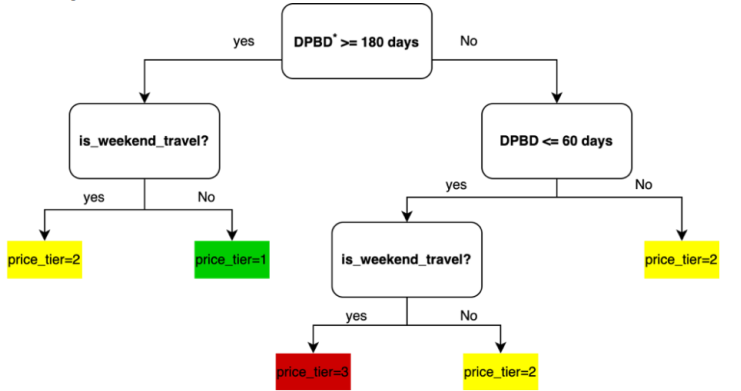

                                                       Figure 4
Thus, the first step is to calculate the total days from the date of purchase to the date of departure by converting string objects to datetime objects (pd.to_datetime()) and subtracting them. If the total days are greater or equal to 180 days and if the departure date is not on weekend (using command .weekday() to check if the date is on Saturday the value will be 5 and on Sunday the value will be 6 so weekday is from 0 to 4) then the price tier should be 1 but if the flight depart on weekend the price will be tier 2. Hence, if the value in a particular cell is different from what it should be then we print out the index, total days, the number of days (weekend or weekday), price_tier in data and the correct one. This is also the same as total days less than 180 days but there is more conditions for this case because if total days are less than 180 days we have to check whether total days are less than or equal to 60 days or not. If the total day is greater than 60 days the value of the price tier will be 2 but if less than or equal to 60 we have to check whether depart date is on a weekday or weekend. If it is on the weekdays price tier will be 2 but on the weekends price tier will be 3.

In [42]:
#check price_tier
for i in dirty_data.index:
    if (pd.to_datetime(dirty_data['dod'][i])-pd.to_datetime(dirty_data['dop'][i])).days >=180: #check total date from purchase date to departure date
        if pd.to_datetime(dirty_data['dod'][i]).weekday() > 4:#check whether the depature date is on weekend or not
            if dirty_data['price_tier'][i] != 2: #if price_tier in a particular cell not equl to 2
                print(f'index:{i} day:{(pd.to_datetime(dirty_data["dod"][i])-pd.to_datetime(dirty_data["dop"][i])).days} on:{pd.to_datetime(dirty_data["dod"][i]).weekday()} data:{dirty_data["price_tier"][i]} should be price_tier:2')
        else:
            if dirty_data['price_tier'][i] != 1: #if price_tier in a particular cell not equl to 1
                print(f'index:{i} day:{(pd.to_datetime(dirty_data["dod"][i])-pd.to_datetime(dirty_data["dop"][i])).days} on:{pd.to_datetime(dirty_data["dod"][i]).weekday()} data:{dirty_data["price_tier"][i]} should be price_tier:1')
    else:
        if (pd.to_datetime(dirty_data['dod'][i])-pd.to_datetime(dirty_data['dop'][i])).days <= 60: #if total days less than or equal to 60 days
            if pd.to_datetime(dirty_data['dod'][i]).weekday() > 4: #check whether the depature date is on weekend or not
                if dirty_data['price_tier'][i] != 3:#if price_tier in a particular cell not equl to 3
                    print(f'index:{i} day:{(pd.to_datetime(dirty_data["dod"][i])-pd.to_datetime(dirty_data["dop"][i])).days} on:{pd.to_datetime(dirty_data["dod"][i]).weekday()} data:{dirty_data["price_tier"][i]} should be price_tier:3')
            else:
                if dirty_data['price_tier'][i] != 2:#if price_tier in a particular cell not equl to 2
                    print(f'index:{i} day:{(pd.to_datetime(dirty_data["dod"][i])-pd.to_datetime(dirty_data["dop"][i])).days} on:{pd.to_datetime(dirty_data["dod"][i]).weekday()} data:{dirty_data["price_tier"][i]} should be price_tier:2')
        else:
            if dirty_data['price_tier'][i] != 2:#if price_tier in a particular cell not equl to 2
                print(f'index:{i} day:{(pd.to_datetime(dirty_data["dod"][i])-pd.to_datetime(dirty_data["dop"][i])).days} on:{pd.to_datetime(dirty_data["dod"][i]).weekday()} data:{dirty_data["price_tier"][i]} should be price_tier:2')


index:141 day:140 on:4 data:1 should be price_tier:2
index:209 day:322 on:4 data:3 should be price_tier:1
index:229 day:353 on:6 data:3 should be price_tier:2
index:230 day:34 on:1 data:1 should be price_tier:2
index:352 day:61 on:3 data:1 should be price_tier:2
index:448 day:226 on:6 data:1 should be price_tier:2
index:454 day:67 on:1 data:1 should be price_tier:2


We use the same process and create the function passing data as an argument to correct the anomaly in the price_tier column then called the function and re-check the data after fixing it.

In [43]:
def price_tier_cleaning(data):
    for i in data.index:
        if (pd.to_datetime(data['dod'][i])-pd.to_datetime(data['dop'][i])).days >=180: #check total date from purchase date to departure date
            if pd.to_datetime(data['dod'][i]).weekday() > 4:#if the depature date is on weekday
                if data['price_tier'][i] != 2: #if price_tier in a particular cell not equl to 2
                    data.loc[i,'price_tier'] = 2 #then change the value in that cell to 2
            else: #if the depature date is on weekend
                if data['price_tier'][i] != 1: #if price_tier in a particular cell not equl to 1
                    data.loc[i,'price_tier'] = 1 #then change the value in that cell to 1
        else: #if total days less than 180
            if (pd.to_datetime(data['dod'][i])-pd.to_datetime(data['dop'][i])).days <= 60: #if total days less than or equal to 60 days
                if pd.to_datetime(data['dod'][i]).weekday() > 4: #check whether the depature date is on weekend or not
                    if data['price_tier'][i] != 3: #if price_tier in a particular cell not equl to 3
                        data.loc[i,'price_tier'] = 3 #then change the value in that cell to 3
                else: #if the depature date is on weekend
                    if data['price_tier'][i] != 2: #if price_tier in a particular cell not equl to 2
                        data.loc[i,'price_tier'] = 2 #then change the value in that cell to 2
            else: #if total days greater than 60 days
                if data['price_tier'][i] != 2: #if price_tier in a particular cell not equl to 2
                    data.loc[i,'price_tier'] = 2 #then change the value in that cell to 2
    return data #return data


In [44]:
#called fucntion to clean data
dirty_data = price_tier_cleaning(dirty_data)

In [45]:
#re-check price_tier
for i in dirty_data.index:
    if (pd.to_datetime(dirty_data['dod'][i])-pd.to_datetime(dirty_data['dop'][i])).days >=180: #check total date from purchase date to departure date
        if pd.to_datetime(dirty_data['dod'][i]).weekday() > 4:#check whether the depature date is on weekend or not
            if dirty_data['price_tier'][i] != 2:
                print(f'index:{i} day:{(pd.to_datetime(dirty_data["dod"][i])-pd.to_datetime(dirty_data["dop"][i])).days} on:{pd.to_datetime(dirty_data["dod"][i]).weekday()} data:{dirty_data["price_tier"][i]} should be price_tier:2')
        else:
            if dirty_data['price_tier'][i] != 1:
                print(f'index:{i} day:{(pd.to_datetime(dirty_data["dod"][i])-pd.to_datetime(dirty_data["dop"][i])).days} on:{pd.to_datetime(dirty_data["dod"][i]).weekday()} data:{dirty_data["price_tier"][i]} should be price_tier:1')
    else:
        if (pd.to_datetime(dirty_data['dod'][i])-pd.to_datetime(dirty_data['dop'][i])).days <= 60:
            if pd.to_datetime(dirty_data['dod'][i]).weekday() > 4:
                if dirty_data['price_tier'][i] != 3:
                    print(f'index:{i} day:{(pd.to_datetime(dirty_data["dod"][i])-pd.to_datetime(dirty_data["dop"][i])).days} on:{pd.to_datetime(dirty_data["dod"][i]).weekday()} data:{dirty_data["price_tier"][i]} should be price_tier:3')
            else:
                if dirty_data['price_tier'][i] != 2:
                    print(f'index:{i} day:{(pd.to_datetime(dirty_data["dod"][i])-pd.to_datetime(dirty_data["dop"][i])).days} on:{pd.to_datetime(dirty_data["dod"][i]).weekday()} data:{dirty_data["price_tier"][i]} should be price_tier:2')
        else:
            if dirty_data['price_tier'][i] != 2:
                print(f'index:{i} day:{(pd.to_datetime(dirty_data["dod"][i])-pd.to_datetime(dirty_data["dop"][i])).days} on:{pd.to_datetime(dirty_data["dod"][i]).weekday()} data:{dirty_data["price_tier"][i]} should be price_tier:2')

### 2.3.8 Impute missing data <a class="anchor" id="section_2_3_8"></a>

Before we check the has_loyalty column in dirty data, we move to missing data first. The reason for doing so is we can use missing data to train the linear regression model which is more accurate than using outlier or dirty data to train the model because in missing data only the price column that has a missing value but in other columns the data is correct so if we filter the row that has missing value out and uses this to train model the outcome should be close to the actual value.

#### 2.3.8.1 Check overall data <a class="anchor" id="section_2_3_8_1"></a>

Thus we read the missing file and store it in the variable name missing_data and using command .info(), describe () to check the overall of the data and isnull().sum() to sum null row in each column.

In [46]:
#read missing file
missing_data = read_file(file_missing)

In [47]:
#check data type and count non null
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticket_id       500 non-null    object 
 1   airline_flight  500 non-null    object 
 2   name            500 non-null    object 
 3   gender          500 non-null    object 
 4   dob             500 non-null    object 
 5   dop             500 non-null    object 
 6   dod             500 non-null    object 
 7   is_adult        500 non-null    int64  
 8   from            500 non-null    object 
 9   to              500 non-null    object 
 10  distance        500 non-null    float64
 11  num_stops       500 non-null    int64  
 12  has_loyalty     500 non-null    int64  
 13  price_tier      500 non-null    int64  
 14  price           350 non-null    float64
dtypes: float64(2), int64(4), object(9)
memory usage: 58.7+ KB


In [48]:
missing_data.describe()

,is_adult,distance,num_stops,has_loyalty,price_tier,price
count,500.00000,500.000000,500.000000,500.000000,500.000000,350.000000
mean,0.63600,8513.160060,1.212000,0.482000,1.688000,1454.209857
std,0.48163,4767.054712,0.737661,0.500176,0.547042,813.343760
min,0.00000,172.800000,0.000000,0.000000,1.000000,250.280000
25%,0.00000,4839.375000,1.000000,0.000000,1.000000,851.655000
50%,1.00000,8026.005000,1.000000,0.000000,2.000000,1270.480000
75%,1.00000,12241.302500,2.000000,1.000000,2.000000,1910.262500
max,1.00000,19430.910000,2.000000,1.000000,3.000000,4631.600000


In [49]:
missing_data.isnull().sum()

ticket_id           0
airline_flight      0
name                0
gender              0
dob                 0
dop                 0
dod                 0
is_adult            0
from                0
to                  0
distance            0
num_stops           0
has_loyalty         0
price_tier          0
price             150
dtype: int64

#### 2.3.8.2 Create necessary columns and drop rows that contain the missing value <a class="anchor" id="section_2_3_8_2"></a>

The price of the ticket is calculated differently for each airline but they have the same factors that affected the price which is is_adult, num_stops and interaction between price_tier and distance also calculated by a linear model. Hence, in order to impute the price we have to use a linear regression model to predict the price.

The first process of this part is creating a new column in the missing_data name interaction which the value is from price_tier multiplied with distance. The second process is to create the column name original_price and assign an empty value to this column. The next step is using for loop to iterate each row and calculate the original price the reason for calculating the original price is because the price in the data has a discount of 10% if has_loyalty equal 1. In order to get more accuracy in the linear regression model, we have to convert the price back to the original first so the code below is to fill out all rows that price is not empty and calculate the original price.

In [50]:
missing_data["interaction"]=missing_data["price_tier"]*missing_data["distance"] #new column which value from price_tier*distance
missing_data["original_price"]="" #create new column name original_price and assign empty value
for i in missing_data.index: #iterate all rows
    if missing_data["price"][i] != "": #if price in particular row not missing
        if missing_data["has_loyalty"][i]==1: #if has_loyalty equal 1
            missing_data.loc[i,"original_price"] = round((missing_data["price"][i]*10/9),2) #convert price before include discount
        elif missing_data["has_loyalty"][i]==0:#if ha_loyalty equal 0
            missing_data.loc[i,"original_price"] = missing_data["price"][i] #the original price equal price


In [51]:
#check total null value for every columns
missing_data.isnull().sum()

ticket_id           0
airline_flight      0
name                0
gender              0
dob                 0
dop                 0
dod                 0
is_adult            0
from                0
to                  0
distance            0
num_stops           0
has_loyalty         0
price_tier          0
price             150
interaction         0
original_price    150
dtype: int64

As we mentioned above, the price for each airline calculate separately so we have to create a variable for each airline to store the data frame for a particular airline also without a null value so the format of code will be using .loc to choose the rows and using str.match to match the particular name of each airline. Besides, to train the model we need only 4 columns which are is_adult, num_stops, interaction (price_tier * distance) and original_price.

In [52]:
#create new variable to store the necessary column for a particular airline
omega_data = missing_data.loc[missing_data.airline_flight.str.match('Omega'),["is_adult","num_stops","interaction","original_price"]]
calisto_data = missing_data.loc[missing_data.airline_flight.str.match('Calisto'),["is_adult","num_stops","interaction","original_price"]]
adonis_data = missing_data.loc[missing_data.airline_flight.str.match('Adonis'),["is_adult","num_stops","interaction","original_price"]]

In [53]:
#check the total null value
omega_data.isnull().sum()

is_adult           0
num_stops          0
interaction        0
original_price    45
dtype: int64

In [54]:
#check the total null value
calisto_data.isnull().sum()

is_adult           0
num_stops          0
interaction        0
original_price    53
dtype: int64

In [55]:
#check the total null value
adonis_data.isnull().sum()

is_adult           0
num_stops          0
interaction        0
original_price    52
dtype: int64

In this step, we will remove the null value and re-check the correctness after we remove all the rows that contain null.

In [56]:
#check shape of each file to compare after take out null value
print(omega_data.shape)
print(calisto_data.shape)
print(adonis_data.shape)

(155, 4)
(185, 4)
(160, 4)


In [57]:
#remove all rows that null
omega_data.dropna(inplace=True)
calisto_data.dropna(inplace=True)
adonis_data.dropna(inplace=True)

In [58]:
#check for the null again
omega_data.isnull().sum()

is_adult          0
num_stops         0
interaction       0
original_price    0
dtype: int64

In [59]:
#check for the null again
calisto_data.isnull().sum()

is_adult          0
num_stops         0
interaction       0
original_price    0
dtype: int64

In [60]:
#check for the null again
adonis_data.isnull().sum()

is_adult          0
num_stops         0
interaction       0
original_price    0
dtype: int64

In [61]:
#check for the shape whether the columns still the same or not after remove all the rows that contain null
print(omega_data.shape)
print(calisto_data.shape)
print(adonis_data.shape)

(110, 4)
(132, 4)
(108, 4)


#### 2.3.8.3 Train the linear regression model <a class="anchor" id="section_2_3_8_3"></a>

Since we get the necessary data so we can train the model. Firstly, create 3 new variables and assign the linear regression class to each of them. Then split train and test data for each airline separate by the independent variable(x) and dependent variable(y). The variable beginning with x will contain the columns is_adult, num_stops and interaction and the variable beginning with y will be the original_price.

In [62]:
#create object class linear regression
LR_omega = LinearRegression()
LR_calisto = LinearRegression()
LR_adonis = LinearRegression()

In [63]:
#split the data in to train and test for each airline
# x_omega_train, x_omega_test, y_omega_train, y_omega_test = train_test_split(omega_data.iloc[:,:-1],omega_data.iloc[:,-1:],random_state=1)
# x_calisto_train, x_calisto_test, y_calisto_train, y_calisto_test = train_test_split(calisto_data.iloc[:,:-1],calisto_data.iloc[:,-1:],random_state=1)
# x_adonis_train, x_adonis_test, y_adonis_train, y_adonis_test = train_test_split(adonis_data.iloc[:,:-1],adonis_data.iloc[:,-1:],random_state=1)

In [66]:
x_omega_train,y_omega_train = omega_data.iloc[:,:-1],omega_data.iloc[:,-1:]
x_calisto_train,y_calisto_train = calisto_data.iloc[:,:-1],calisto_data.iloc[:,-1:]
x_adonis_train,y_adonis_train = adonis_data.iloc[:,:-1],adonis_data.iloc[:,-1:]

Train model using .fit() command and pass variable for training as an argument for each airline.

In [67]:
#train the model
LR_calisto.fit(x_calisto_train,y_calisto_train)
LR_omega.fit(x_omega_train,y_omega_train)
LR_adonis.fit(x_adonis_train,y_adonis_train)

LinearRegression()

Then we use .predict() command to predict the price and store it in variable y_(airline name)_prediction then compare the predictive price and original_price to see how much difference between predictive data and actual data and use different value plot boxplot to analyse the difference between these 2. Furthermore, we check for the r score to see the coefficient of the model. All these steps will apply to each airline.

In [ ]:
#predict the price using model and use it subtract with actual price to find the residual and plot the residual
y_calisto_prediction = LR_calisto.predict(x_calisto_test)
residual_calisto = y_calisto_test-y_calisto_prediction
residual_calisto["original_price"] = pd.to_numeric(residual_calisto["original_price"])
residual_calisto.boxplot()

In [ ]:
#check the r score to see coefficient of determination of prediction
LR_calisto.score(x_calisto_test,y_calisto_test)

In [ ]:
#predict the price using model and use it subtract with actual price to find the residual and plot the residual
y_omega_prediction = LR_omega.predict(x_omega_test)
residual_omega = y_omega_test-y_omega_prediction
residual_omega["original_price"] = pd.to_numeric(residual_omega["original_price"])
residual_omega.boxplot()

In [ ]:
#check the r score to see coefficient of determination of prediction
LR_omega.score(x_omega_test,y_omega_test)

In [ ]:
#predict the price using model and use it subtract with actual price to find the residual and plot the residual
y_adonis_prediction = LR_adonis.predict(x_adonis_test)
residual_adonis = y_adonis_test-y_adonis_prediction
residual_adonis["original_price"] = pd.to_numeric(residual_adonis["original_price"])
residual_adonis.boxplot()

In [ ]:
#check the r score to see coefficient of determination of prediction
LR_adonis.score(x_adonis_test,y_adonis_test)

All of the models seem to have a high coefficient score and the maximum outlier from residual between predictive price and the original price is around 12$ this number seems not to differ much from the actual data.

#### 2.3.8.4 Impute value and save file <a class="anchor" id="section_2_3_8_4"></a>

The purpose of the code chunk below is to store the index of all rows that contain the missing values. The reason for this is to check the particular rows that after impute all of the rows are done correctly.

In [68]:
#store index that contain null value for checking again after impute the value
omega_null_index = list(missing_data.loc[missing_data.airline_flight.str.match('Omega')&missing_data.price.isnull()].index)
calisto_null_index = list(missing_data.loc[missing_data.airline_flight.str.match('Calisto')&missing_data.price.isnull()].index)
adonis_null_index = list(missing_data.loc[missing_data.airline_flight.str.match('Adonis')&missing_data.price.isnull()].index)

The predictive price from the model is the price before a discount of 10% if the passenger has loyalty. Thus, the predictive price for each model will impute in the column name original_price and only in the rows that contain missing value then we create the function name impute_price to check whether the passenger has a loyalty or not if they have loyalty then the price column will equal the original_price multiplied by 0.9 if not the price will equal original_price. The arguments using in this function are data and the name of the airline.

In [69]:
#impute the predictive price in original_price column for each airline
missing_data.loc[missing_data.airline_flight.str.match('Omega')&missing_data.price.isnull(),"original_price"] = LR_omega.predict(missing_data.loc[missing_data.airline_flight.str.match('Omega')&missing_data.price.isnull(),["num_stops","is_adult","interaction"]])
missing_data.loc[missing_data.airline_flight.str.match('Calisto')&missing_data.price.isnull(),"original_price"] = LR_calisto.predict(missing_data.loc[missing_data.airline_flight.str.match('Calisto')&missing_data.price.isnull(),["num_stops","is_adult","interaction"]])
missing_data.loc[missing_data.airline_flight.str.match('Adonis')&missing_data.price.isnull(),"original_price"] = LR_adonis.predict(missing_data.loc[missing_data.airline_flight.str.match('Adonis')&missing_data.price.isnull(),["num_stops","is_adult","interaction"]])

In [70]:
#function to impute in the price column by checking column has_loyalty to calculate the actual price
def impute_price(data,airline):
    for i in data.loc[data.airline_flight.str.match(airline)&data.price.isnull()].index: #loop only the index that contain missing value
        if data["has_loyalty"][i]==1: #check if has_loyalty equal 1
            data.loc[i,"price"] = round(data.loc[i,"original_price"]*0.9,2) #if has_loyalty equal 1 then price is equal predictive price*0.9
        elif data["has_loyalty"][i]==0: #check if has_loyalty equal 0
            data.loc[i,"price"] = round(data.loc[i,"original_price"],2) #if has_loyalty equal 0 then price is equal predictive price
    return data #return data

Then we call the function to impute the price value in each airline and check whether the value is properly imputed by using the variable name (airline name)_null_index which contains the index of rows that contain missing values and select using the command iloc().

In [71]:
#call function to impute value in Omega airline
missing_data = impute_price(missing_data,"Omega")

In [72]:
#check whether the value already imputed or not
missing_data.iloc[omega_null_index]

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,distance,num_stops,has_loyalty,price_tier,price,interaction,original_price
41,IDZZ93374,Omega\OG-289,Mr. Charles Lara,M,1992-10-13,2021-02-08,2021-03-04,1,Ethiopia,Suriname,10663.42,1,0,2,1690.15,21326.84,1690.151325
45,IDZZ07897,Omega\OG-522,Ms. Antoinette Lamb,F,1990-11-15,2021-09-26,2022-03-03,1,Grenada,Myanmar [Burma],15511.66,1,0,2,2271.70,31023.32,2271.699302
55,IDZZ26184,Omega\OG-081,Ms. Diane Castro,F,2017-05-19,2021-04-21,2022-03-10,0,Hungary,Guam,11378.09,1,1,1,1083.17,11378.09,1203.51788
58,IDZZ77522,Omega\OG-061,Mr. Michael Carlson,M,1991-01-20,2021-05-18,2021-11-22,1,Kuwait,Bhutan,4186.52,0,1,1,496.26,4186.52,551.397567
69,IDZZ97591,Omega\OG-292,Ms. Frances Ward,F,1981-04-17,2021-09-20,2021-10-30,1,Kenya,Nepal,5846.42,1,0,3,1462.99,17539.26,1462.990594
80,IDZZ02858,Omega\OG-274,Mr. Gerald Hatcher,M,1996-01-23,2021-10-09,2021-11-12,1,Suriname,Benin,6472.64,2,1,2,1168.40,12945.28,1298.226149
90,IDZZ40783,Omega\OG-481,Mr. Gilbert Robinett,M,1982-10-31,2021-12-01,2022-01-29,1,Mexico,Mozambique,15665.36,2,1,3,3006.39,46996.08,3340.428458
92,IDZZ55895,Omega\OG-814,Mr. Steven Struck,M,1980-06-26,2021-05-28,2022-02-06,1,Saint Helena,Papua New Guinea,15624.88,1,0,2,2285.28,31249.76,2285.280078
93,IDZZ46300,Omega\OG-939,Ms. Amiee Pellerin,F,1983-10-14,2021-04-02,2021-06-08,1,Tuvalu,Antigua and Barbuda,13495.59,2,0,2,2140.63,26991.18,2140.631303
121,IDZZ35095,Omega\OG-293,Ms. Latasha Shipp,F,1983-05-01,2021-01-09,2021-09-26,1,Bhutan,Ethiopia,5614.57,1,0,2,1084.54,11229.14,1084.540113


In [73]:
#call function to impute value in Calisto airline
missing_data = impute_price(missing_data,"Calisto")

In [74]:
#check whether the value already imputed or not
missing_data.iloc[calisto_null_index]

,ticket_id,airline_flight,name,gender,dob,dop,dod,is_adult,from,to,distance,num_stops,has_loyalty,price_tier,price,interaction,original_price
10,IDYY55143,Calisto\CS-578,Ms. Doris Crum,F,2003-02-16,2021-01-22,2021-06-20,1,India,Bouvet Island,10980.01,2,0,2,2298.42,21960.02,2298.422561
18,IDYY75006,Calisto\CS-599,Mr. Aaron Kulikowski,M,1993-01-20,2021-04-29,2021-06-13,1,Benin,Australia,14614.90,1,1,3,3534.73,43844.70,3927.481446
23,IDYY61797,Calisto\CS-743,Ms. Irene Jackson,F,2010-03-01,2021-03-09,2021-09-21,0,Gaza Strip,Comoros,4919.40,2,0,1,1054.86,4919.40,1054.862582
26,IDYY42546,Calisto\CS-911,Ms. Hattie Duggar,F,2013-05-31,2021-10-06,2022-01-29,0,Saint Pierre and Miquelon,Mauritius,13451.48,1,0,2,2691.83,26902.96,2691.83169
39,IDYY66542,Calisto\CS-825,Ms. Donna Dahle,F,1997-12-05,2021-10-23,2022-01-17,1,Barbados,Malaysia,17221.66,1,1,2,2857.85,34443.32,3175.387751
61,IDYY50367,Calisto\CS-877,Ms. Lea Melancon,F,1987-07-01,2021-07-24,2021-10-29,1,Laos,Bhutan,1494.70,0,1,2,483.71,2989.40,537.453411
72,IDYY31040,Calisto\CS-029,Ms. Kimberly Barberio,F,2021-06-29,2021-06-27,2021-10-02,0,South Africa,Madagascar,2745.06,0,0,2,857.17,5490.12,857.165909
73,IDYY37994,Calisto\CS-522,Mr. Mark Hebrank,M,1984-05-17,2021-05-12,2021-06-06,1,South Korea,Malaysia,4409.59,2,0,3,1599.94,13228.77,1599.938076
81,IDYY95988,Calisto\CS-027,Mr. Benjamin Jones,M,2009-07-21,2021-10-12,2022-05-08,0,Barbados,Moldova,8786.08,2,1,2,1860.35,17572.16,2067.0609
96,IDYY63584,Calisto\CS-247,Ms. Leslie Cox,F,1993-11-29,2021-08-07,2022-04-12,1,Palestinian Territories,Christmas Island,8843.73,1,0,1,1127.47,8843.73,1127.466038


In [75]:
#call function to impute value in Adonis airline
missing_data = impute_price(missing_data,"Adonis")

In [ ]:
#check whether the value already imputed or not
missing_data.iloc[adonis_null_index]

After checking that all the missing rows have been imputed, we drop the column that we created(interaction and original_price), and re-check the missing_data again to ensure that those 2 columns have been dropped and all the null have been imputed by using the command isnull().sum() to check there is no missing value left and info() to check the amount of the row still the same. The last step to complete the missing file is to call the function save_file and send an argument as a file name and data.

In [76]:
#drop columns
missing_data = missing_data.drop(columns=["interaction","original_price"])

In [77]:
#check null
missing_data.isnull().sum()

ticket_id         0
airline_flight    0
name              0
gender            0
dob               0
dop               0
dod               0
is_adult          0
from              0
to                0
distance          0
num_stops         0
has_loyalty       0
price_tier        0
price             0
dtype: int64

In [78]:
#check overall
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticket_id       500 non-null    object 
 1   airline_flight  500 non-null    object 
 2   name            500 non-null    object 
 3   gender          500 non-null    object 
 4   dob             500 non-null    object 
 5   dop             500 non-null    object 
 6   dod             500 non-null    object 
 7   is_adult        500 non-null    int64  
 8   from            500 non-null    object 
 9   to              500 non-null    object 
 10  distance        500 non-null    float64
 11  num_stops       500 non-null    int64  
 12  has_loyalty     500 non-null    int64  
 13  price_tier      500 non-null    int64  
 14  price           500 non-null    float64
dtypes: float64(2), int64(4), object(9)
memory usage: 58.7+ KB


In [79]:
#save missing file that already impute value
save_file("_missing_solution",missing_data)

### 2.3.9 Check and correct has_loyalty column <a class="anchor" id="section_2_3_9"></a>

After we finished imputing the value in the missing file then we move back to the dirty file. The first thing to do in this step, we removed unnecessary columns in the variable dirty_data and create new column name interaction and assign the value as price_tier*distance also create a new column name predictive_price to assign an empty value first. Following this, we use the linear regression model of each airline from the missing file part to predict the price and store value in column predictive_price.

In [ ]:
#drop the columns that unnecessary and check data frame
dirty_data = dirty_data.drop(columns=["title","firstname","lastname","airline","abreviation","flight_number","age_year"])
#check whether those columns are dropped or not
dirty_data

In [ ]:
dirty_data["interaction"] = dirty_data["price_tier"]*dirty_data["distance"] #create interaction column (price_tier*distance)
dirty_data["predictive_price"] = "" #create new column predictive_price assign empty value to it
dirty_data #check data

In [ ]:
#predict the price for each airline and store it in predictive_price column
dirty_data.loc[dirty_data.airline_flight.str.match('Omega'),"predictive_price"] = LR_omega.predict(dirty_data.loc[dirty_data.airline_flight.str.match('Omega'),["is_adult","num_stops","interaction"]])
dirty_data.loc[dirty_data.airline_flight.str.match('Calisto'),"predictive_price"] = LR_calisto.predict(dirty_data.loc[dirty_data.airline_flight.str.match('Calisto'),["is_adult","num_stops","interaction"]])
dirty_data.loc[dirty_data.airline_flight.str.match('Adonis'),"predictive_price"] = LR_adonis.predict(dirty_data.loc[dirty_data.airline_flight.str.match('Adonis'),["is_adult","num_stops","interaction"]])

In [ ]:
#check data again
dirty_data

The next step we move to check has loyalty, the method for checking this is we subtract price and predictive_price put the value in absolute to avoid negative sign compare with price subtract with predictive_price* 0.9 also put it in absolute. If predictive_price is close to the price it means that the outcome from subtractions will be close to 0 then |price-predictive_price| < |price-(predictive_price* 0.9)|. In this case, the value in the has_loyalty column should be 0. But if the |price-(predictive_price*0.9)| < |price-predictive_price| it means has_loyalty should be 1 (see flow chart in figure 5).

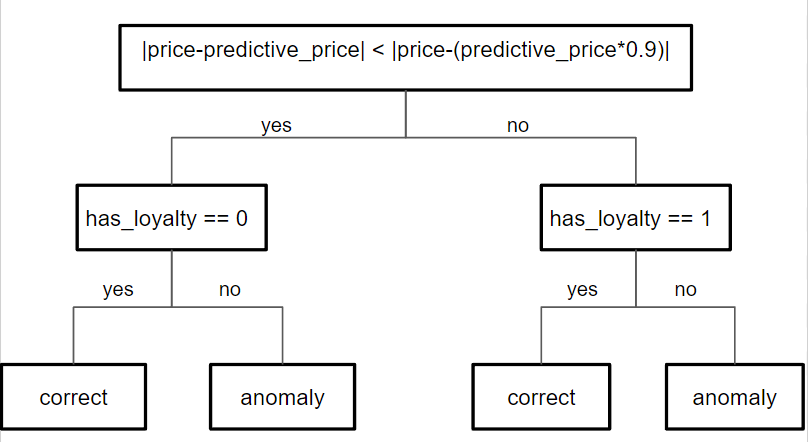


                                                              Figure 5


In [ ]:
for i in dirty_data.index:
    if abs(dirty_data.loc[i,"price"]-dirty_data.loc[i,"predictive_price"])<abs(dirty_data.loc[i,"price"]-(dirty_data.loc[i,"predictive_price"]*0.9)): #compare between predictive_price and predictive_price*0.9 if price-predictive_price is less than price-(predictive_price*0.9) means there is no 10% discount
        if dirty_data.loc[i,"has_loyalty"]==0: #if has_loyalty == 0
            continue
        else: #if has_loyalty == 1
            print(f'index = {i} predictive: {abs(dirty_data.loc[i,"price"]-dirty_data.loc[i,"predictive_price"])} < predictive*0.9: {abs(dirty_data.loc[i,"price"]-(dirty_data.loc[i,"predictive_price"]*0.9))} has_loyalty in data is {dirty_data.loc[i,"has_loyalty"]} but should be 0')
    else: #if price-(predictive_price*0.9) less than price-predictive_price (means there is a discount apply in the price)
        if dirty_data.loc[i,"has_loyalty"]==1: #if has_loyalty == 1
            continue
        else: #if has_loyalty == 0
            print(f'index = {i} predictive: {abs(dirty_data.loc[i,"price"]-dirty_data.loc[i,"predictive_price"])} > predictive*0.9: {abs(dirty_data.loc[i,"price"]-(dirty_data.loc[i,"predictive_price"]*0.9))} has_loyalty in data is {dirty_data.loc[i,"has_loyalty"]} but should be 1')

Hence, we apply the same logic to create the function name has_loyalty_cleaning and passing data as an argument with correcting data instead of printing the index and anomaly out.

In [ ]:
def has_loyalty_cleaning(data):
    for i in data.index:
        if abs(data.loc[i,"price"]-data.loc[i,"predictive_price"])<abs(data.loc[i,"price"]-(data.loc[i,"predictive_price"]*0.9)):#if price-predictive_price less than price-(predictive_price*0.9) (means there is no discount apply in the price)
            if data.loc[i,"has_loyalty"]==0: #if has_loyalty == 0
                continue
            else: #if has_loyalty ==1
                data.loc[i,"has_loyalty"]=0 #change to 0
        else: #if price-(predictive_price*0.9) less than price-predictive_price (means there is a discount apply in the price)
            if data.loc[i,"has_loyalty"]==1: #if has_loyalty == 1
                continue
            else: #if has_loyalty == 0
                data.loc[i,"has_loyalty"]=1 #change to 1
    return data #return data

Then call the function to correct the has_loyalty column and re-check it again.

In [ ]:
#call function
dirty_data = has_loyalty_cleaning(dirty_data)

In [ ]:
#re-check again for make sure that anomaly in has_loyalty already correct
for i in dirty_data.index:
    if abs(dirty_data.loc[i,"price"]-dirty_data.loc[i,"predictive_price"])<abs(dirty_data.loc[i,"price"]-(dirty_data.loc[i,"predictive_price"]*0.9)):
        if dirty_data.loc[i,"has_loyalty"]==0:
            continue
        else:
            print(f'index = {i} predictive: {abs(dirty_data.loc[i,"price"]-dirty_data.loc[i,"predictive_price"])} < predictive*0.9: {abs(dirty_data.loc[i,"price"]-(dirty_data.loc[i,"predictive_price"]*0.9))} has_loyalty in data is {dirty_data.loc[i,"has_loyalty"]} but should be 0')
    else:
        if dirty_data.loc[i,"has_loyalty"]==1:
            continue
        else:
            print(f'index = {i} predictive: {abs(dirty_data.loc[i,"price"]-dirty_data.loc[i,"predictive_price"])} > predictive*0.9: {abs(dirty_data.loc[i,"price"]-(dirty_data.loc[i,"predictive_price"]*0.9))} has_loyalty in data is {dirty_data.loc[i,"has_loyalty"]} but should be 1')

### 2.3.10 Save dirty file <a class="anchor" id="section_2_3_10"></a>

After we ensure that all processes of correcting all columns have been completed, we removed the columns that have been created and check again that the column has already been removed and saved the file for dirty_data.

In [ ]:
#drop the columns that have been created
dirty_data = dirty_data.drop(columns=["interaction","predictive_price"])

In [ ]:
#check data frame
dirty_data

In [ ]:
#save dirty file
save_file("_dirty_solution",dirty_data)

## 2.4 Remove outlier from outlier file <a class="anchor" id="section_2_4"></a>

In this part we will work on the outlier file, we have the linear regression model from the missing file part so we can use this model to predict the price in the outlier file and subtract the predictive price from the original price(price without discount) then we will get the residual value. The residual value we can use to plot the boxplot and see the outlier then we use the 1.5 IQR rule to take out the outlier.

### 2.4.1 Read file and analyse overall data by using graph <a class="anchor" id="section_2_4_1"></a>

Read outlier file and store data in variable name outlier_data.

In [ ]:
#read file
outlier_data = read_file(file_outlier)

The code below aims to visualise the outlier in each column but we can see only the price column that contains outliers so we use a boxplot to see outliers between price and other columns that has an impact on the price (is_adult, num_stops, price_tier, and distance). From the visualisation, we can see that the outlier price does not have conditions with independent variables.

In [ ]:
#plot boxplot to see is there any outlier in each column
outlier_data.boxplot()

In [ ]:
#use boxplot to see outlier in price categorise by price_tier
outlier_data.boxplot(column="price",by="price_tier")

In [ ]:
#use boxplot to see outlier in price categorise by num_stops
outlier_data.boxplot(column="price",by="num_stops")

In [ ]:
#use boxplot to see outlier in price categorise by is_adult
outlier_data.boxplot(column="price",by="is_adult")

In [ ]:
#plot scatter plot to see outlier between price and distance
plt.scatter(outlier_data["distance"],outlier_data["price"],color = "red")
plt.xlabel("distance")
plt.ylabel("price")
plt.grid(True)
plt.show

### 2.4.2 Predict price using the linear regression and plot graph to detect outlier <a class="anchor" id="section_2_4_2"></a>

The steps for predicting the price are the same as in the dirty file and the missing file that needs to create column name interaction which is price_tier*distance and the predictive_price. Then assign predictive price in the predictive_price column. Also, calculate the price that does not contain the discount and store it in the original_price column.

In [ ]:
#created column interaction(price_tier*distance) and predictive_price
outlier_data["interaction"] = outlier_data["price_tier"]*outlier_data["distance"]
outlier_data["predictive_price"] = ""

In [ ]:
#assign value in predictive_column from linear regression model for each airline
outlier_data.loc[outlier_data.airline_flight.str.match('Omega'),"predictive_price"] = LR_omega.predict(outlier_data.loc[outlier_data.airline_flight.str.match('Omega'),["is_adult","num_stops","interaction"]])
outlier_data.loc[outlier_data.airline_flight.str.match('Calisto'),"predictive_price"] = LR_calisto.predict(outlier_data.loc[outlier_data.airline_flight.str.match('Calisto'),["is_adult","num_stops","interaction"]])
outlier_data.loc[outlier_data.airline_flight.str.match('Adonis'),"predictive_price"] = LR_adonis.predict(outlier_data.loc[outlier_data.airline_flight.str.match('Adonis'),["is_adult","num_stops","interaction"]])

In [ ]:
#convert price back to original and store in the original_price column
outlier_data["original_price"]=""
for i in outlier_data.index:
    if outlier_data.loc[i,"has_loyalty"]==1:
        outlier_data.loc[i,"original_price"] = round(outlier_data.loc[i,"price"]*10/9,2)
    else:
        outlier_data.loc[i,"original_price"] = round(outlier_data.loc[i,"price"],2)

Then we create the residual column and the value for this column is the original price subtracted from the predictive price also need to convert the type of data into numeric for plotting the boxplot and scatter plot.

In [ ]:
#create the residual column
outlier_data["residual"] = pd.to_numeric(outlier_data["original_price"]-outlier_data["predictive_price"])

The scatter plot and boxplot help us to analyse outlier easily so we calculate the mean, median, first quartile, third quartile, IQR, upper fence, and lower fence. If the values are outside the interval between the upper fence and lower fence so the values are outliers.

In [ ]:
#plot scatter plot to see outlier
plt.scatter(outlier_data["original_price"],outlier_data["residual"],color = "red")
plt.xlabel("price")
plt.ylabel("residual")
plt.grid(True)
plt.show

In [ ]:
#plot boxplot to see outlier
outlier_bp = outlier_data.boxplot(column="residual")

In [ ]:
#calculate mean, median, quartile, iqr, upper fence, and lower fence
mean = np.round(np.mean(outlier_data["residual"]),2)
median = np.round(np.median(outlier_data["residual"]),2)
q1 = np.round(outlier_data["residual"].quantile(0.25), 2)
q3 = np.round(outlier_data["residual"].quantile(0.75), 2)
iqr = np.round(q3 - q1, 2)
upper_fence = q3+(iqr*1.5)
lower_fence = q1-(iqr*1.5)

In [ ]:
#print out to see the value
print(f'mean:{mean}')
print(f'median:{median}')
print(f'Q1:{q1}')
print(f'Q3:{q3}')
print(f'IQR:{iqr}')
print(f'upper fence:{upper_fence}')
print(f'lower fence:{lower_fence}')

### 2.4.3 Remove outlier and re-check <a class="anchor" id="section_2_4_3"></a>

The output from the code below is the values that residual is outside the interval between the upper and lower fence so we need to remove these rows.

In [ ]:
#check the residual value that outside from the upper fence and lower fence
for i in outlier_data.index:
    if outlier_data.loc[i,"residual"] > 15.055 or outlier_data.loc[i,"residual"] < -14.745: #Interval between upper fence and lower fence
        if outlier_data.loc[i,"has_loyalty"] ==1: #if has_loyalty ==1
            print(f'index:{i} residual: {outlier_data.loc[i,"residual"]} price:{outlier_data.loc[i,"price"]} need to remove (predictive price:{round(outlier_data.loc[i,"predictive_price"]*0.9,2)})')  
        else: #if has_loyalty == 0
            print(f'index:{i} residual: {outlier_data.loc[i,"residual"]}  price:{outlier_data.loc[i,"price"]} need to remove (predictive price:{round(outlier_data.loc[i,"predictive_price"],2)})')
            

We create function name remove_outlier and use the same method of detecting the outlier and we pass the argument as data and the value of upper and lower fence and return data.

In [ ]:
#create function remove outlier
def remove_outlier(data,upper_fence,lower_fence):
    for i in data.index:
        if data.loc[i,"residual"] > upper_fence or data.loc[i,"residual"] < lower_fence: #Interval between upper fence and lower fence
            data = data.drop([i]) #drop rows that residual value are outside upper and lowwer fence
    return data #return data

In [ ]:
#call function and pass outlier_data with the value of upper and lower fence
outlier_data = remove_outlier(outlier_data,upper_fence,lower_fence)

After we call the function and remove the outlier then we plot the boxplot again to re-check that there is no outlier in the residual because after we remove the outlier the value that we calculate of the mean, median, quartile and upper and lower fence will change.

As we can see from the result of the boxplot after we remove the outlier the statistic value will change thus we calculate the statistic value again and remove the outlier.

In [ ]:
outlier_data.boxplot(column="residual")

In [ ]:
#calculate mean, median, quartile, iqr, upper fence, and lower fence again after remove outlier
mean = np.round(np.mean(outlier_data["residual"]),2)
median = np.round(np.median(outlier_data["residual"]),2)
q1 = np.round(outlier_data["residual"].quantile(0.25), 2)
q3 = np.round(outlier_data["residual"].quantile(0.75), 2)
iqr = np.round(q3 - q1, 2)
upper_fence = q3+(iqr*1.5)
lower_fence = q1-(iqr*1.5)

In [ ]:
#print out to see the value
print(f'mean:{mean}')
print(f'median:{median}')
print(f'Q1:{q1}')
print(f'Q3:{q3}')
print(f'IQR:{iqr}')
print(f'upper fence:{upper_fence}')
print(f'lower fence:{lower_fence}')

In [ ]:
#then remove outlier than outside interval
outlier_data = remove_outlier(outlier_data,upper_fence,lower_fence)

After we remove the outlier the second time we plot the boxplot again to ensure there is no outlier left and check with the same method using for loop.

In [ ]:
#recheck the boxplot again
outlier_data.boxplot(column="residual")

In [ ]:
#re-check the residual value that outside from the upper fence and lower fence
for i in outlier_data.index:
    if outlier_data.loc[i,"residual"] > 14.105 or outlier_data.loc[i,"residual"] < -13.935: #Interval between upper fence and lower fence
        if outlier_data.loc[i,"has_loyalty"] ==1: #if has_loyalty ==1
            print(f'index:{i} residual: {outlier_data.loc[i,"residual"]} price:{outlier_data.loc[i,"price"]} need to remove (predictive price:{round(outlier_data.loc[i,"predictive_price"]*0.9,2)})')  
        else: #if has_loyalty == 0
            print(f'index:{i} residual: {outlier_data.loc[i,"residual"]}  price:{outlier_data.loc[i,"price"]} need to remove (predictive price:{round(outlier_data.loc[i,"predictive_price"],2)})')
            

### 2.4.4 Save outlier file <a class="anchor" id="section_2_4_4"></a>

Then the last step to complete the outlier file is to drop the columns that have been created, check whether columns have been dropped and save the file.

In [ ]:
#drop columns
outlier_data =outlier_data.drop(columns=["interaction","predictive_price","original_price","residual"])

In [ ]:
#check
outlier_data

In [ ]:
#save file
save_file("_outlier_solution",outlier_data)

# 3.0 Conclusion <a class="anchor" id="section_3"></a>

To sum up, the processes that we use to detect and correct the anomalies in data are writing algorithms to detect the anomalies, improving logic and algorithms to correct the anomalies, and the last step is re-check the data again. After these processes we detected the anomalies in dirty data as follows this:
- gender
    - anomalies in format
    - gender does not match with the title
- airline_flight
    - anomalies in format
- dob
    - anomalies in format
- dop
    - anomalies in format
- dod
    - anomalies in format
- is_adult
    - the value contained in this column does not match the age
- distance
    - the distance between the 2 countries is incorrect
- price_tier
    - incorrect in price_tier
- has_loyal
    - price does not match the discount or does not have discount

In case of missing data, we use the data from this file to train the linear regression model and impute the value in the data and we use this model to apply to dirty data too. As same as an outlier, we use the linear regression model from missing data to predict the price and use it for detecting outliers in outlier data.

# Reference <a class="anchor" id="reference"></a>

- Carolina, B. (2021). Create and customize boxplots with Python’s Matplotlib to get lots of insights from your data. Retrieve from https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643

- How to create table of contents in a jupyter notebook? (2020). Retrieve from https://moonbooks.org/Articles/How-to-create-a-table-of-contents-in-a-jupyter-notebook-/

- How to find the distance between two lat-long coordinates in Python. (2022). Retrieved from https://www.adamsmith.haus/python/answers/how-to-find-the-distance-between-two-lat-long-coordinates-in-python

- Strftime and Strptime in python. (2022). Retrieve from https://www.nbshare.io/notebook/510557327/Strftime-and-Strptime-In-Python/

